In [1]:
# -*- coding:urf-8 -*-
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table like and matrices
import pandas as pd
import numpy as np

# Modeling Helper
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno

# Configure visualization
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 10,8

result_path = 'result.csv'
valid_path = 'test_valid.csv'
result = pd.read_csv(result_path)
valid = pd.read_csv(valid_path)

In [2]:
result

,Class,SaleDate,saleCount
0,1001,2015-04-01,18.298100
1,1001,2015-04-02,8.364977
2,1001,2015-04-03,11.522151
3,1001,2015-04-04,4.433658
4,1001,2015-04-05,2.688569
5,1001,2015-04-06,2.713800
6,1001,2015-04-07,4.669929
7,1001,2015-04-08,11.545549
8,1001,2015-04-10,4.760827
9,1001,2015-04-11,4.213848


In [4]:
valid

,Class,SaleDate,saleCount
0,1001,2015-04-01,17
1,1001,2015-04-02,10
2,1001,2015-04-03,5
3,1001,2015-04-04,9
4,1001,2015-04-05,7
5,1001,2015-04-06,7
6,1001,2015-04-07,10
7,1001,2015-04-08,13
8,1001,2015-04-10,8
9,1001,2015-04-11,9


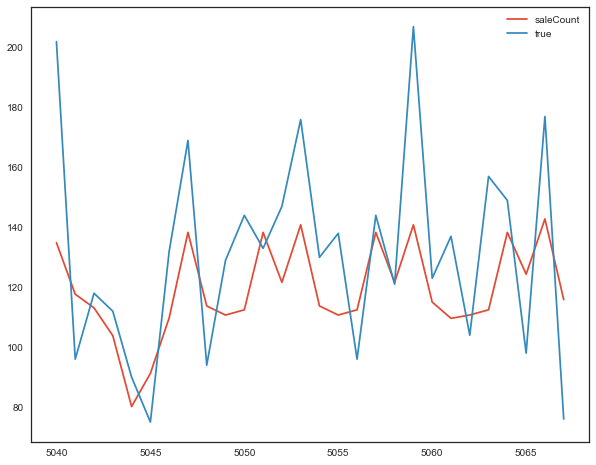

In [26]:
valid.rename(columns={'saleCount':'true'},inplace=True)
result_valid = pd.merge(result,valid, on=['Class','SaleDate'], how='left')
result_valid[result['Class'] == 12][['saleCount','true']].plot()